In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [55]:
# The tech stocks we'll use for this analysis
tech_list = ['MRNA', 'PFE', 'BNTX', 'AZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [56]:
company_list = [MRNA, PFE, BNTX, AZN]
company_name = ["MODERNA", "PFIZER", "BIONTECH", "ASTRAZENECA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-03,52.959999,52.250000,52.869999,52.779999,7917100.0,52.779999,ASTRAZENECA
2020-12-04,54.139999,53.419998,53.549999,53.740002,4685400.0,53.740002,ASTRAZENECA
2020-12-07,54.490002,53.830002,54.380001,54.259998,6582900.0,54.259998,ASTRAZENECA
2020-12-08,55.060001,53.619999,53.669998,54.720001,6707600.0,54.720001,ASTRAZENECA
2020-12-09,55.020000,53.810001,54.959999,54.040001,7952400.0,54.040001,ASTRAZENECA
2020-12-10,54.200001,53.669998,53.860001,53.889999,7566800.0,53.889999,ASTRAZENECA
2020-12-11,54.349998,53.630001,53.630001,54.270000,3870000.0,54.270000,ASTRAZENECA
2020-12-14,51.570000,49.889999,50.669998,50.029999,54898600.0,50.029999,ASTRAZENECA
2020-12-15,50.830002,50.090000,50.610001,50.830002,22247400.0,50.830002,ASTRAZENECA


In [57]:
# Summary Stats
MRNA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,60.288925,55.885028,58.344602,58.198031,1.733433e+07,58.198031
std,33.322634,30.559663,32.307400,31.961052,1.825777e+07,31.961052
min,18.080000,17.680000,17.990000,17.780001,4.889000e+05,17.780001
25%,30.057500,26.562500,28.455000,28.185000,6.217125e+06,28.185000
50%,64.965000,59.782501,62.895000,62.474998,1.170200e+07,62.474998
75%,73.562498,69.087500,71.372499,71.219999,2.170085e+07,71.219999
max,178.500000,164.300003,177.660004,169.860001,1.255523e+08,169.860001


In [58]:
# General info
MRNA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-16 to 2020-12-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    int64  
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


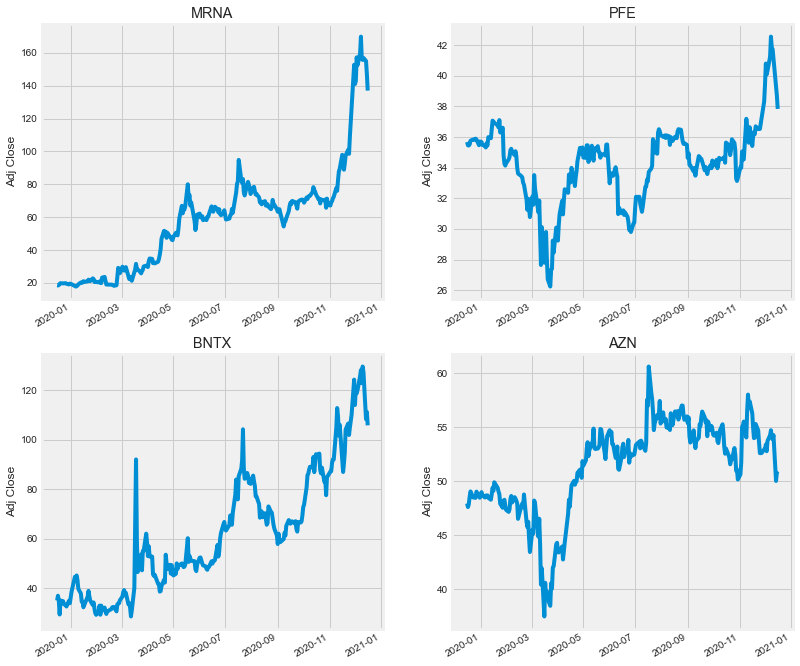

In [59]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

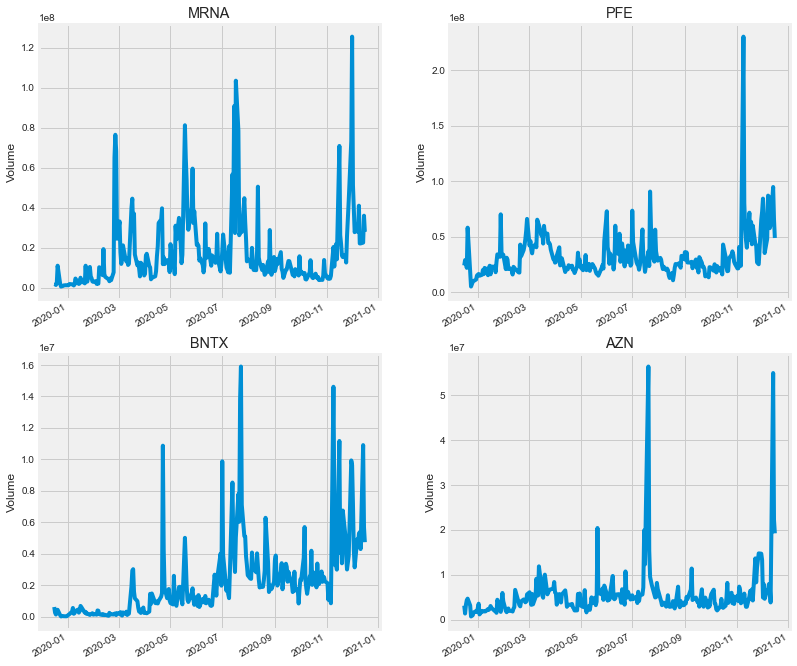

In [60]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

## What was the moving average of the various stocks

In [61]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [62]:
print(PFE.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


## Now let's go ahead and plot all the additional Moving Averages

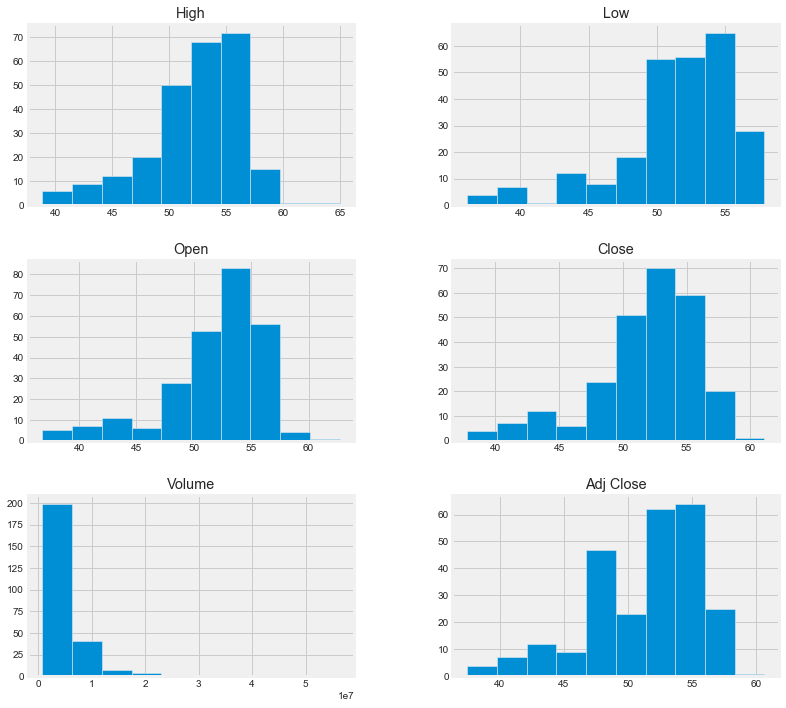

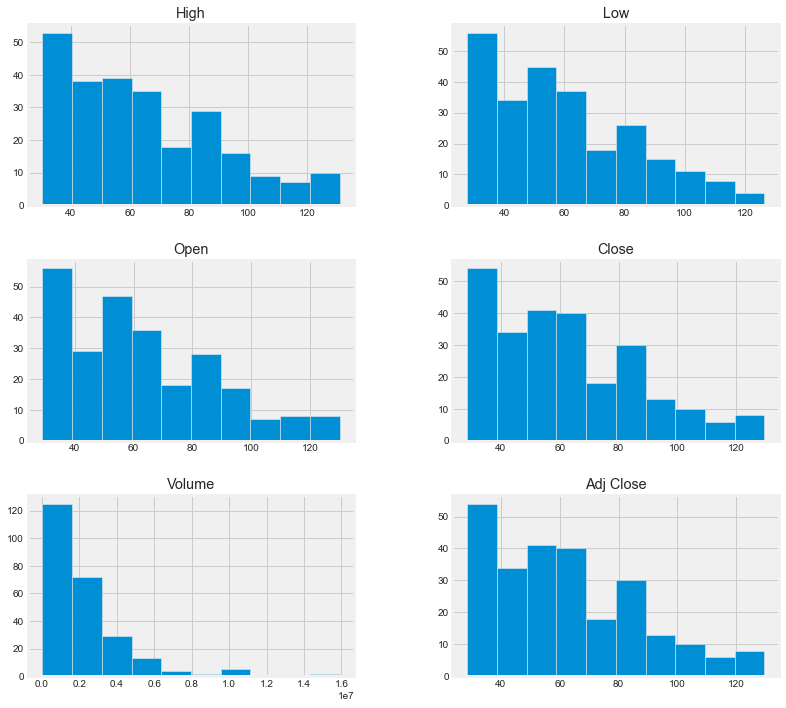

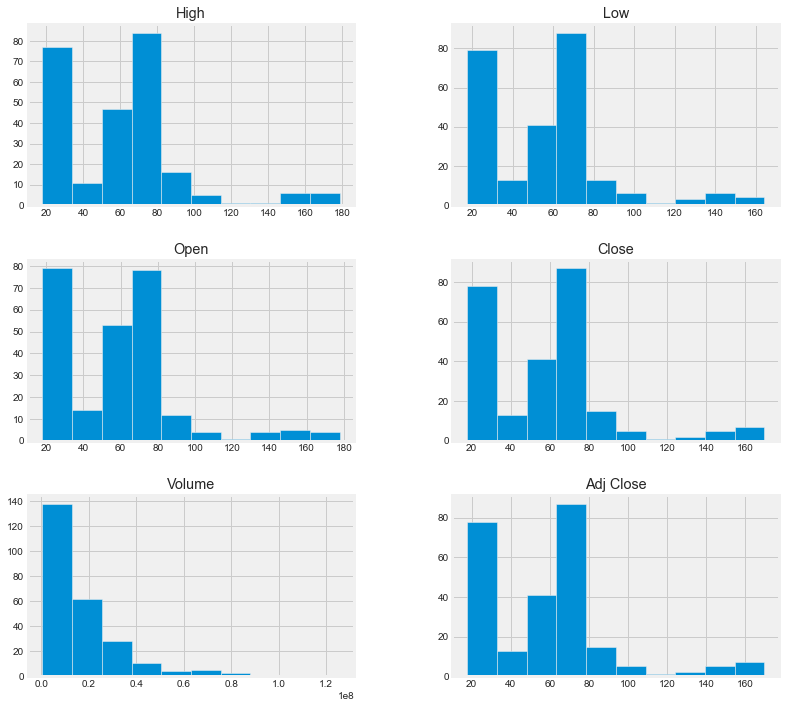

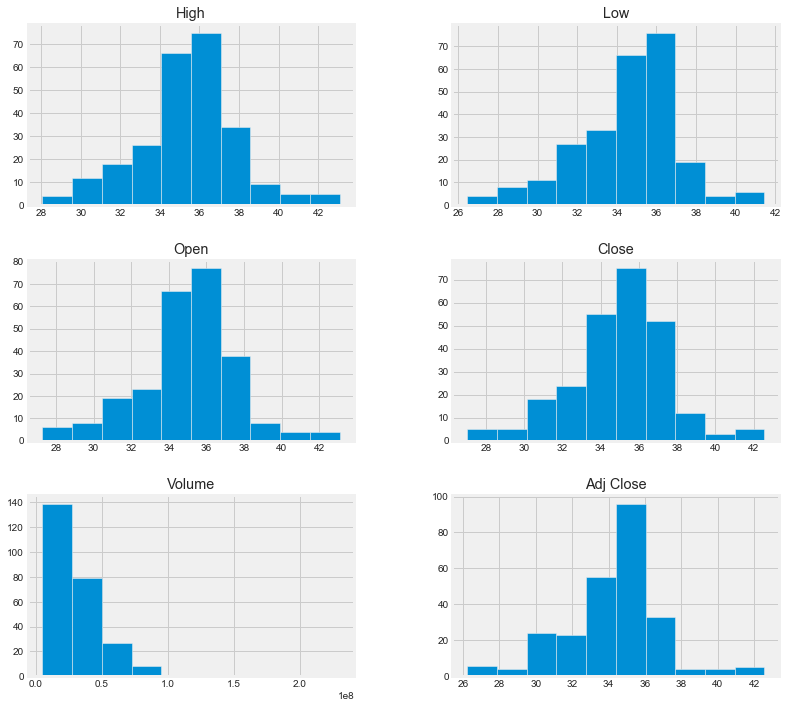

In [63]:
df.groupby("company_name").hist(figsize=(12, 12));

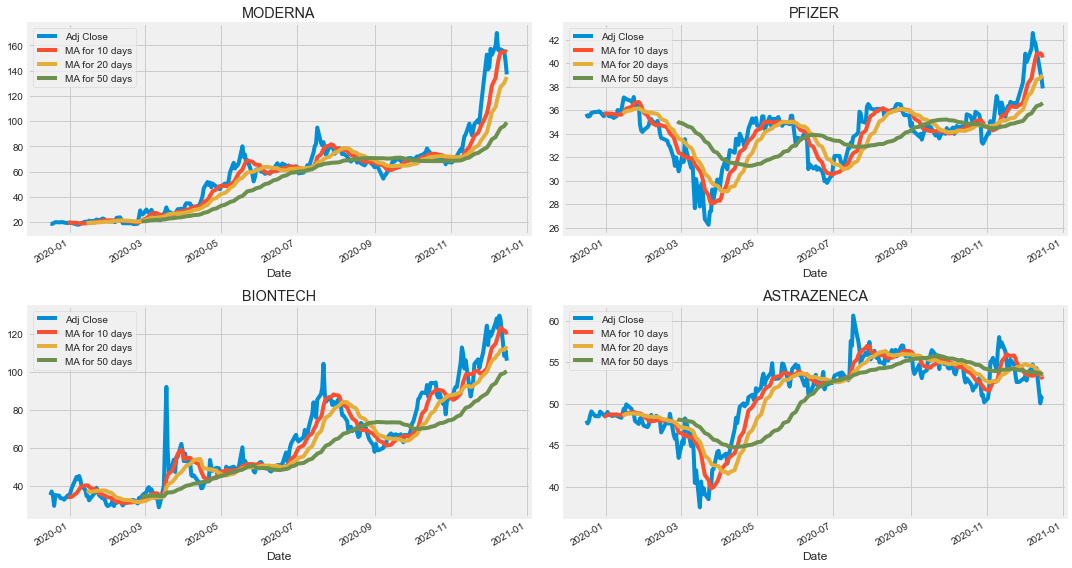

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

MRNA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MODERNA')

PFE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('PFIZER')

BNTX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BIONTECH')

AZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('ASTRAZENECA')
fig.tight_layout()

## 3. What was the daily return of the stock on average?¶

## Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the stocks.

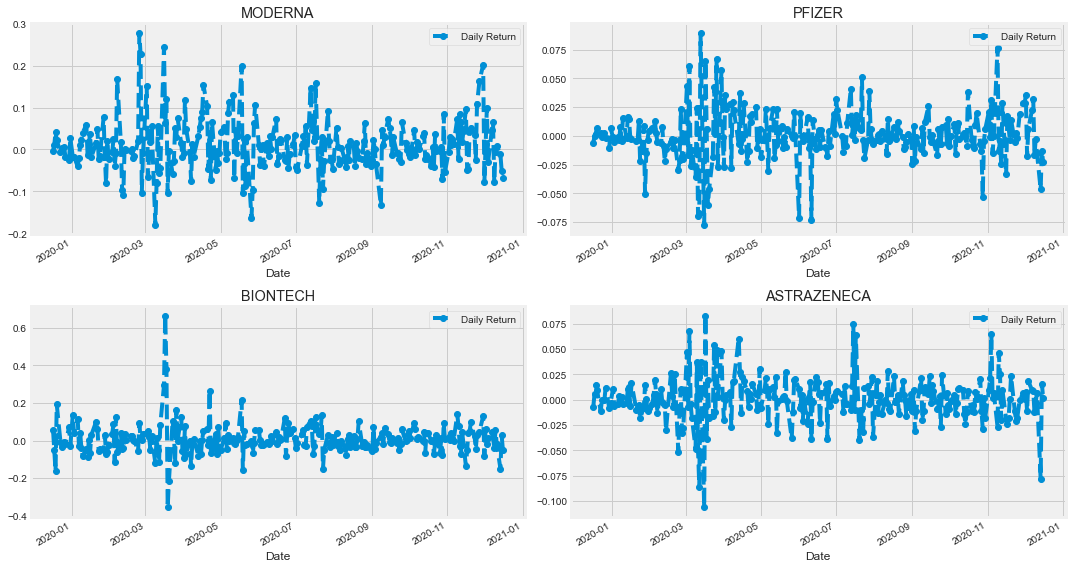

In [65]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

MRNA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MODERNA')

PFE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('PFIZER')

BNTX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BIONTECH')
AZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ASTRAZENECA')

fig.tight_layout()

## Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

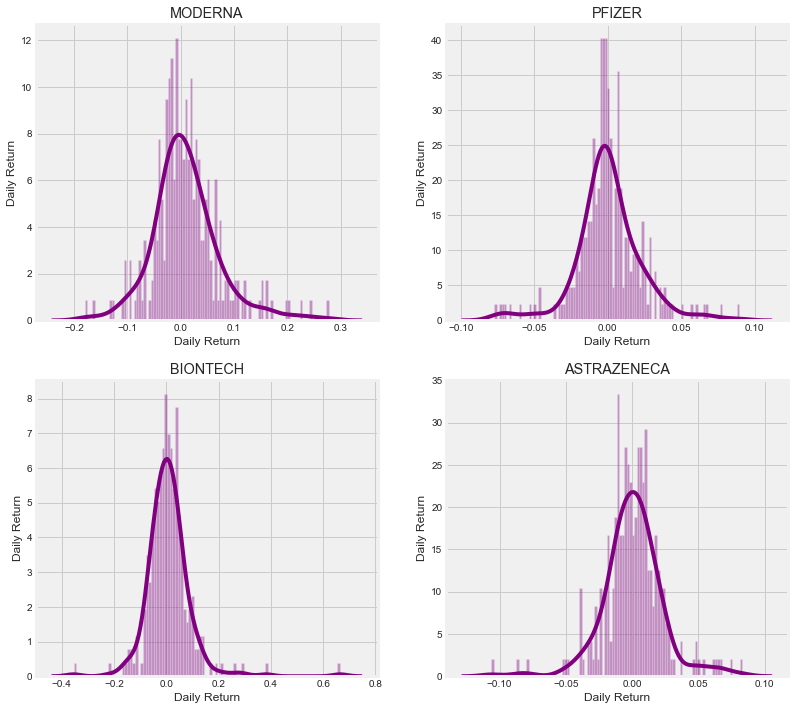

In [66]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
# MRNA['Daily Return'].hist()
# PFE['Daily Return'].hist()
# BNTX['Daily Return'].hist()
# AZN['Daily Return'].hist()

## 4. What was the correlation between different stocks closing prices?

### Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [67]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,MRNA,PFE,BNTX,AZN
Date,,,,
2019-12-16,18.520000,35.677311,35.000000,47.941986
2019-12-17,18.440001,35.458542,36.910000,47.611420
2019-12-18,18.639999,35.449429,35.000000,47.873932
2019-12-19,19.410000,35.522350,29.340000,48.583675
2019-12-20,19.830000,35.759350,34.970001,49.060078


## Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the MODERNA stock.

In [68]:
# Make a new tech returns DataFrame
vac_rets = closing_df.pct_change()
vac_rets.head()

Symbols,MRNA,PFE,BNTX,AZN
Date,,,,
2019-12-16,NaN,NaN,NaN,NaN
2019-12-17,-0.004320,-0.006132,0.054571,-0.006895
2019-12-18,0.010846,-0.000257,-0.051747,0.005514
2019-12-19,0.041309,0.002057,-0.161714,0.014825
2019-12-20,0.021638,0.006672,0.191888,0.009806


## Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


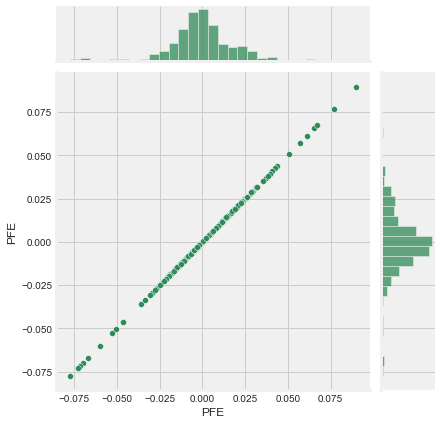

In [69]:
# Comparing Pfizer to itself should show a perfectly linear relationship
sns.jointplot('PFE', 'PFE', vac_rets, kind='scatter', color='seagreen')

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


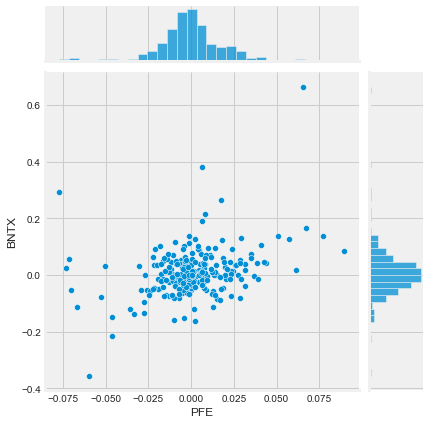

In [70]:
# We'll use joinplot to compare the daily returns of Pfizer and Biontech
sns.jointplot('PFE', 'BNTX', vac_rets, kind='scatter')

### So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

### Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our vaccine stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\peter\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


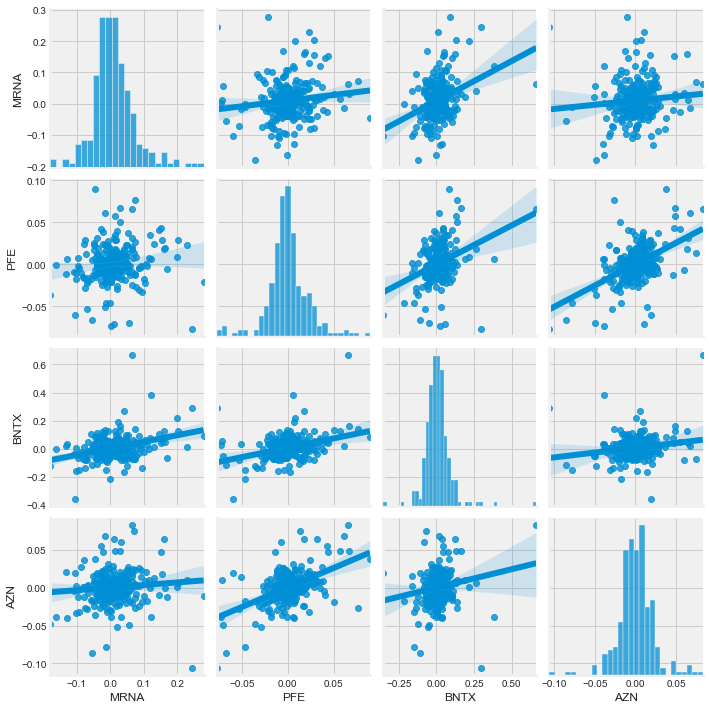

In [71]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(vac_rets, kind='reg')

### Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Pfizer and Astrazeneca daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

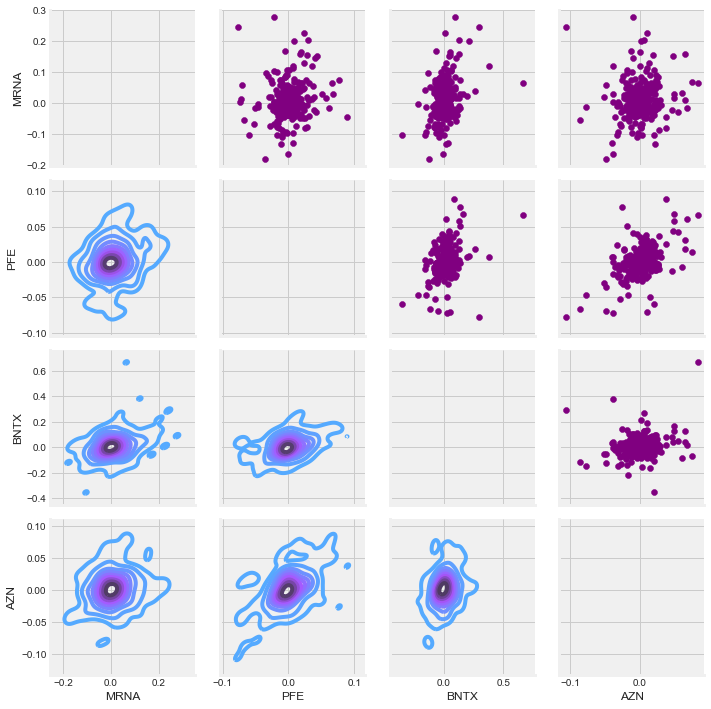

In [72]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(vac_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

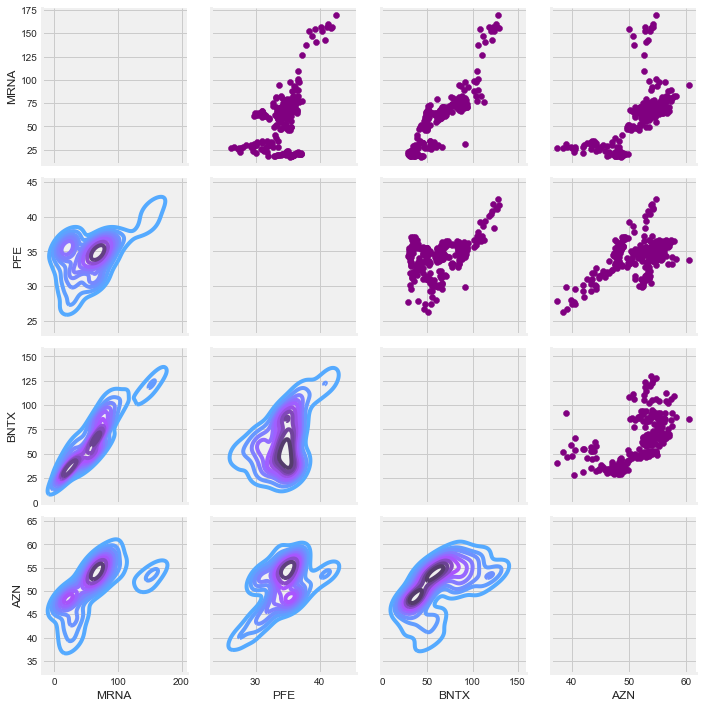

In [73]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Pfizer and Moderna.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

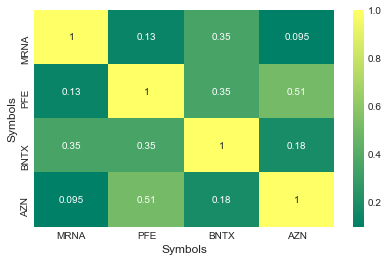

In [74]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(vac_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

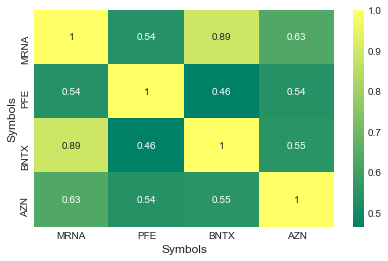

In [75]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

### We see here numerically and visually that Pfizer and Astrazeneca had the strongest correlation of daily stock return. It's also interesting to see that all the vaccine comapnies are positively correlated.

### 5. How much value do we put at risk by investing in a particular stock?

### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

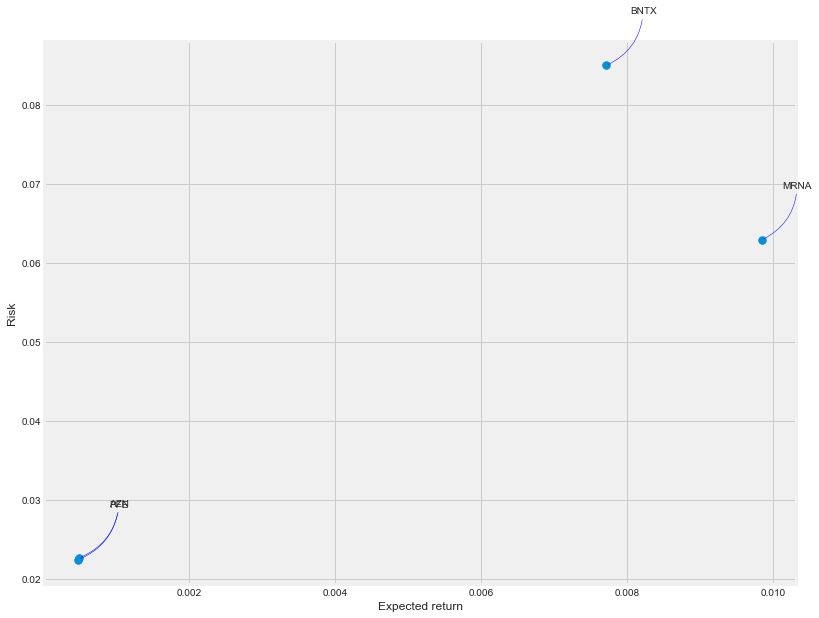

In [76]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = vac_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### 6. Predicting the closing price stock price of MODERNA inc

In [77]:
#Get the stock quote
df = DataReader('MRNA', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-07,22.750000,18.51,22.000000,18.600000,12995600,18.600000
2018-12-10,19.438999,18.00,18.900000,18.799999,4233300,18.799999
2018-12-11,20.660000,17.99,20.549999,18.010000,3435300,18.010000
2018-12-12,19.480000,18.02,18.549999,18.680000,2590700,18.680000
2018-12-13,19.290001,18.68,19.250000,18.760000,1608600,18.760000


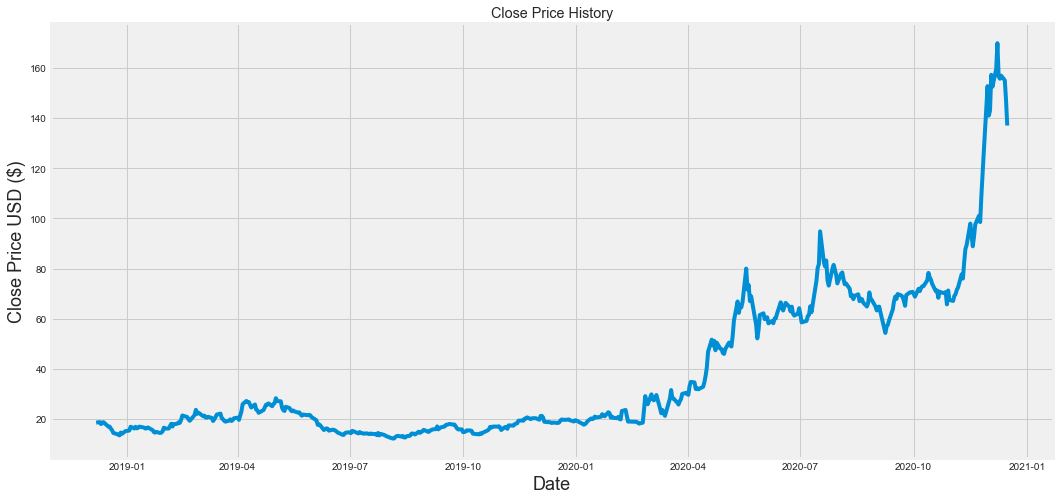

In [78]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [79]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

409

In [80]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [81]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04022843, 0.04149746, 0.03648477, 0.04073604, 0.04124365,
       0.03845177, 0.03007614, 0.03007614, 0.0248731 , 0.02055837,
       0.01402284, 0.01123096, 0.00799493, 0.01516497, 0.01199238,
       0.01909899, 0.01947969, 0.02055837, 0.02982233, 0.02544416,
       0.02975889, 0.02582487, 0.02677665, 0.03007614, 0.02842639,
       0.02747462, 0.02538071, 0.02569796, 0.02810914, 0.02093909,
       0.0160533 , 0.01510152, 0.01681472, 0.01389594, 0.01503807,
       0.01821066, 0.02753807, 0.0251269 , 0.02544416, 0.03121827,
       0.03730964, 0.03039339, 0.03635787, 0.0375    , 0.04079949,
       0.03978427, 0.04695431, 0.05824873, 0.05437817, 0.04860406,
       0.04492386, 0.04835025, 0.05958121, 0.07258884, 0.06243655,
       0.06560914, 0.06351523, 0.05621828, 0.05780457, 0.05323604])]
[0.05285532933720398]

[array([0.04022843, 0.04149746, 0.03648477, 0.04073604, 0.04124365,
       0.03845177, 0.03007614, 0.03007614, 0.0248731 , 0.02055837,
       0.01402284, 0.01123096, 0.00

In [82]:
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

349/349 [==============================] - 18s 51ms/step - loss: 0.0025


In [83]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11.755077098414898

<ipython-input-84-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


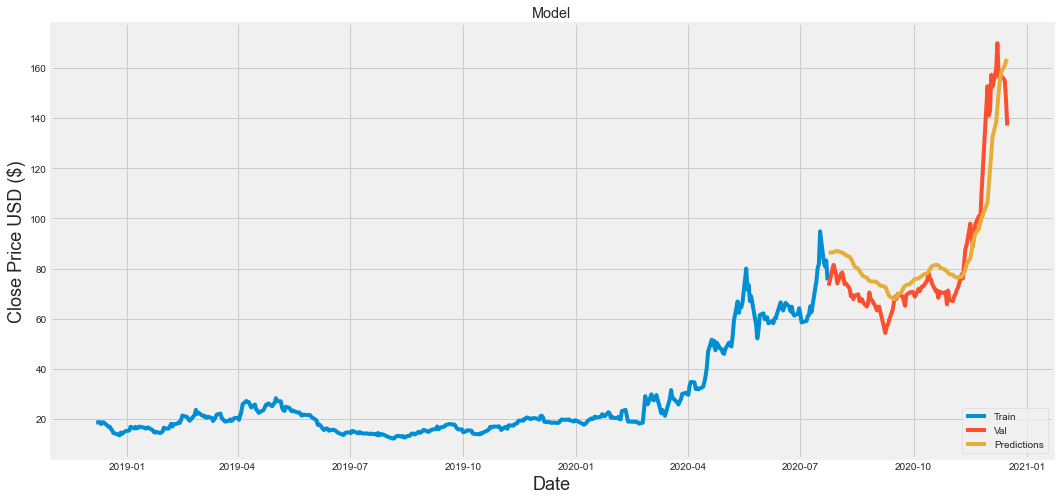

In [84]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-24,73.209999,80.311287
2020-07-27,79.910004,80.611420
2020-07-28,81.489998,80.920700
2020-07-29,79.510002,81.325134
2020-07-30,77.629997,81.639053
...,...,...
2020-12-10,155.690002,144.444901
2020-12-11,156.929993,147.913422
2020-12-14,155.070007,150.649689


# Testing on PFE

In [94]:
#Get the stock quote
test_df = DataReader('PFE', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
test_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,20.872866,20.721062,20.740038,20.844402,53124300.0,15.047052
2012-01-04,20.825426,20.635674,20.796965,20.654650,31912500.0,14.910077
2012-01-05,20.607210,20.294117,20.607210,20.493359,52764800.0,14.793642
2012-01-06,20.664137,20.455408,20.607210,20.464895,31613600.0,14.773097
2012-01-09,20.721062,20.407970,20.455408,20.702087,41786000.0,14.944319


In [95]:
#Create a new dataframe with only the 'Close column
data_test = test_df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data_test.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1804

In [96]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [98]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.9582289931860206

In [132]:
df_prediction_tester = pd.DataFrame(predictions)

In [130]:
# Plot the data
train = data_test[:training_data_len]
valid = data_test[training_data_len:]
valid['Predictions'] = df_prediction_tester.values

In [130]:
valid

<ipython-input-130-9528bca66d18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = df_prediction_tester.values


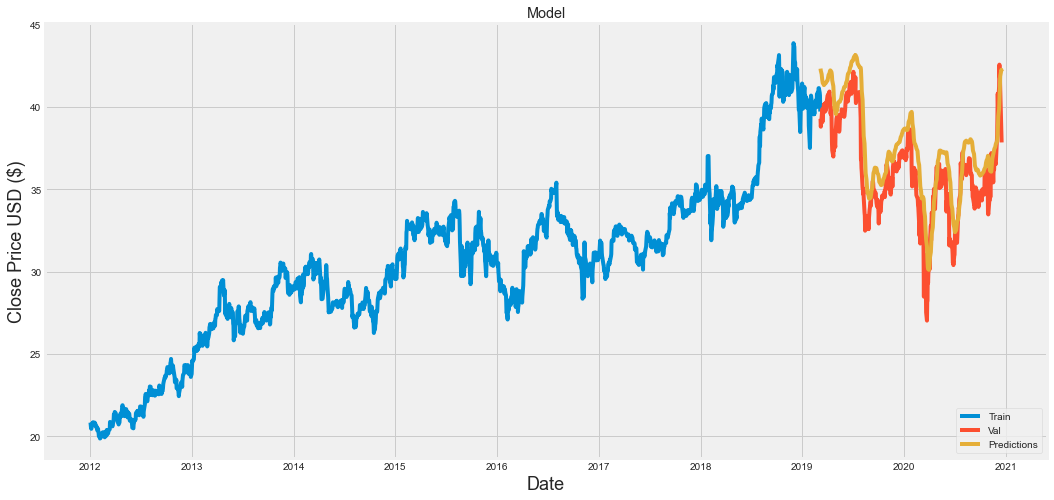

In [131]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('PFE Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Testing on AZN

In [141]:
#Get the stock quote
test2_df = DataReader('AZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
test2_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,23.895000,23.459999,23.525000,23.860001,3493400.0,15.166736
2012-01-04,23.780001,23.520000,23.730000,23.735001,3253000.0,15.087276
2012-01-05,23.465000,23.155001,23.240000,23.424999,2606000.0,14.890223
2012-01-06,23.565001,23.200001,23.315001,23.485001,2009600.0,14.928361
2012-01-09,23.379999,23.174999,23.355000,23.285000,2971400.0,14.801228


In [142]:
#Create a new dataframe with only the 'Close column
data_test2 = test2_df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data_test2.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1804

In [143]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [144]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.8795949522315856

In [145]:
df_prediction_tester2 = pd.DataFrame(predictions)

In [147]:
# Plot the data
train = data_test2[:training_data_len]
valid = data_test2[training_data_len:]
valid['Predictions'] = df_prediction_tester2.values

<ipython-input-147-66fdedbc316b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = df_prediction_tester2.values


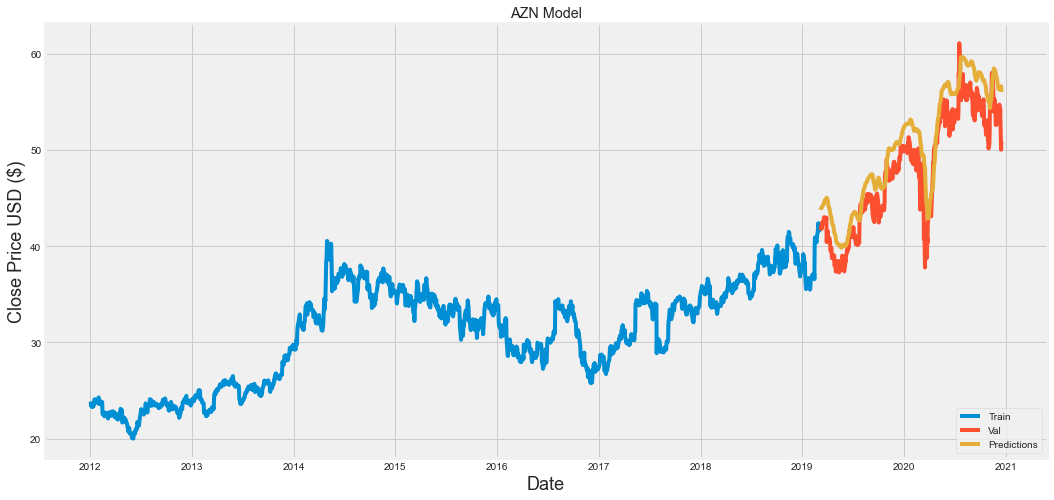

In [149]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('AZN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [150]:
valid

,Close,Predictions
Date,,
2019-03-07,41.660000,43.789135
2019-03-08,41.770000,43.897747
2019-03-11,42.189999,43.971085
2019-03-12,41.849998,44.050720
2019-03-13,42.450001,44.101776
...,...,...
2020-12-10,53.889999,56.479668
2020-12-11,54.270000,56.546768
2020-12-14,50.029999,56.626148
